In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import os
import sys
import math
import numpy.linalg

import scipy.stats as stat
import index_haps as idh

#Bulk VAFs

In [2]:
#Import bulk VAF data
variant_annotations_amps = pd.read_csv('../Data/VAF_data/bulkVAF_data.tsv', sep = '\t', index_col = 0)
#variant_annotations_amps

In [3]:
#Create empty values for PD7151 missing amplicon
cs = list(variant_annotations_amps.columns)
blank1 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.1',
 'PD7151_TET2a',
 'PD7151']
blank2 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.21',
 'PD7151_TET2b',
 'PD7151']
blank3 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.15',
 'PD7151_SRSF2',
 'PD7151']
blank = pd.DataFrame(np.array([blank1, blank2, blank3]),columns=cs)

In [4]:
#Create a new df with the blank values and rearrange for plotting
var_ann_blank = pd.concat([variant_annotations_amps, blank])
#print(var_ann_blank.shape[0])
#Drop PD7151 SRSF2 as rescue failed
#var_ann_blank = var_ann_blank.loc[~var_ann_blank['Amplicon'].isin(['PD7151_SRSF2'])]
#print(var_ann_blank.shape[0])

var_ann_blank = var_ann_blank[['celltype', 'Mean_VAF', 'Amplicon', 'patient_init']]
var_ann_blank.sort_values(by=['Amplicon'], inplace = True)
var_ann_blank.sort_values(by=['celltype'], inplace = True)

In [5]:
#Exclude PD7151-SRSF2 (had hoped to rescue, but it failed)
var_ann_blank = var_ann_blank.loc[~var_ann_blank['Amplicon'].isin(['PD7151_SRSF2'])]
var_ann_blank

,celltype,Mean_VAF,Amplicon,patient_init
66,BM,0.414,PD7151_TET2a,PD7151
62,BM,0.454,PD7153_TET2a,PD7153
16,BM,0.437,PD7153_SRSF2,PD7153
8,BM,0.084,PD7153_CUX1,PD7153
69,BM,0.448,PD7151_TET2b,PD7151
46,BM,0.332,JP001_TET2b_g,JP001
72,BM,0.332,JP001_TET2a,JP001
4,BM,0.474,PD7153_TET2b,PD7153
54,BM,0.338,JP001_SRSF2,JP001
58,BM,0.049,JP001_RUNX1_g,JP001


In [6]:
#Rearrange again
patients = ['PD7153', 'PD7151', 'JP001']
alt_id = ['H198302', 'H198303', 'H198304']
pt_label = dict(zip(patients, alt_id))

all_amps = ['PD7153_TET2a',
            'PD7151_TET2a',
            'JP001_TET2a',
            'PD7153_TET2b',
            'PD7151_TET2b',
            'JP001_TET2b_g',
            'PD7153_SRSF2',
            'JP001_SRSF2',
            'PD7153_CUX1',
            'JP001_RUNX1_g'
           ]
short_label = ['TET2[a]',
               'TET2[a]',
               'TET2[a]',
               'TET2[b]',
               'TET2[b]',
               'TET2[b]',
               'SRSF2',
               'SRSF2',
               'CUX1',
               'RUNX1'
              ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

cell_order = ['BM', 'Mono', 'Neut', 'nBC']
cell_order_map = {x:i for i, x in enumerate(cell_order)}

var_ann_blank['x_value'] = var_ann_blank['celltype'].map(cell_order_map)

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.12
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.12

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.12
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_CUX1', 'x_value'] += 0.12

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.04

In [7]:
#Create proxy artists for legend
f,ax = plt.subplots()
JP001_labels = [ 'JP001_TET2a',  'JP001_TET2b_g', 'JP001_SRSF2', 'JP001_RUNX1_g']
JP001_handles = []
for lab in JP001_labels:
    line = ax.scatter([0], [0], label=lab, color=allVAFcols[lab], alpha = 0.5, s = 60, edgecolor = 'black')
    JP001_handles.append(line)
JP001_labels_r = [relabel.get(x) for x in JP001_labels]    

PD7153_labels = [ 'PD7153_TET2a', 'PD7153_TET2b','PD7153_SRSF2', 'PD7153_CUX1']
PD7153_handles = []
for lab in PD7153_labels:
    line = ax.scatter([0], [0], label=lab, color=allVAFcols[lab], alpha = 0.5, s = 60, edgecolor = 'black')
    PD7153_handles.append(line)
PD7153_labels_r = [relabel.get(x) for x in PD7153_labels]  

PD7151_labels = ['PD7151_TET2a', 'PD7151_TET2b']
PD7151_handles = []
for lab in PD7151_labels:
    line = ax.scatter([0], [0], label=lab, color=allVAFcols[lab], alpha = 0.5, s = 60, edgecolor = 'black')
    PD7151_handles.append(line)
PD7151_labels_r = [relabel.get(x) for x in PD7151_labels]  

m_shapes = ['*', 's', 'p', '^' ]
cs = ['BM', 'Mono', 'Neut', 'nBC']
m_style = dict(zip(cs, m_shapes))

cs_labels = ['BM', 'Mono', 'Neut', 'nBC']
cs_handles = []
for lab in cs_labels:
    marker = m_style[lab]
    line = ax.scatter([0], [0], label=lab, marker = marker, color = 'white', alpha = 0.5, s = 60, edgecolor = 'black')
    cs_handles.append(line)
plt.close(f)

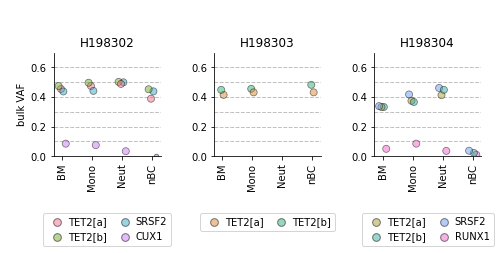

In [8]:
#Plot the VAFS
fig, (ax1,ax) = plt.subplots(2, 3, figsize = (7,4), gridspec_kw = dict(height_ratios = [1,4]), sharex = True)

#Adding dummy plot at top to match spacing exactly with scVAF plot
for count, patient in enumerate(patients):
    ax1[count].set_yscale('log')
    ax1[count].set_ylim(1, 1000)
    ax1[count].set_yticks([1, 10, 100, 1000])
    ax1labels = ['', 10, 100, 1000]
    ax1[count].set_yticklabels(ax1labels, color = 'white') 
    #ax1[count].set_title(f'{patient}') 
    ax1[count].spines['top'].set_visible(False)
    ax1[count].spines['right'].set_visible(False)
    ax1[count].spines['bottom'].set_visible(False)
    ax1[count].spines['left'].set_visible(False)
    ax1[count].tick_params(axis='x', colors='white')
    ax1[count].tick_params(axis='y', colors='white')    
    if count != 0:
        ax1[count].set_yticklabels([])
    else:
        ax1[count].set_ylabel('Cell #', color = 'white')

for count, patient in enumerate(patients):
    plot_data = var_ann_blank.loc[var_ann_blank['patient_init'].isin([patient])]
    
    x = plot_data['x_value']
    y = plot_data['Mean_VAF']
    
    sns.scatterplot(x, y , data = plot_data,  s = 50, hue = 'Amplicon', palette = allVAFcols, alpha = 0.5, edgecolor = 'black', ax = ax[count])
    
    
    handles, labels = ax[count].get_legend_handles_labels()
    lbl = []
    for lb in labels[1:]:
        lbl.append(relabel[lb])    
    
    lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:], labels=lbl)
    #ax[count].set_title(f'{patient}') 
    ax[count].set_ylim(0,0.7)
    ax[count].axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    ax[count].margins(x=0.1)
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    pl = pt_label[patient]
    ax[count].set_title(f'{pl}')

    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    
    if count == 0:
        ax[count].set_ylabel('bulk VAF')
    
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        lh.set_edgecolor('black')

#Plot 0 for undetected CUX1 in PD7153 nBC
x = 3.12
y = 0
color = allVAFcols['PD7153_CUX1']
ax[0].scatter(x, y ,  s = 20, color = color, alpha = 0.5, edgecolor = 'black')        

#Add legends

ax[2].legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax[0].legend(handles = PD7153_handles, labels = PD7153_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax[1].legend(handles = PD7151_handles, labels = PD7151_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
        
plt.rcParams['svg.fonttype'] = 'none'  
fig.tight_layout(h_pad = 0, w_pad = 2)     

fig.savefig(f'../Results/Bulk_VAFs_Fig1.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/Bulk_VAFs_Fig1.png',bbox_inches='tight', dpi = 600)

#scVAFs

PD7151
Cells with at least 10 reads for amplicon PD7151_TET2b  =  3122
Mono 698
Neut 699
nBC 703
CD34 1022
Cells with at least 10 reads for amplicon PD7151_TET2a  =  1795
Mono 633
Neut 298
nBC 330
CD34 534


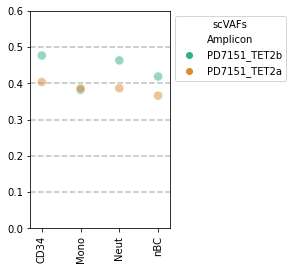

In [9]:
sourcefile = f'../Data/Amp_data/clean_anon_allele_counts_resc_2.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'PD7151'
plate = idh.data_retrieval2(sourcefile, metadata, pt_id)
reads = 10
plate
plate1_PD7151 = idh.calc_scVAF_mod_resc(plate, pt_id, reads, draw_plot = True)

PD7153
Cells with at least 10 reads for amplicon PD7153_TET2b  =  1278
Mono 323
Neut 255
nBC 17
CD34 683
Cells with at least 10 reads for amplicon PD7153_SRSF2  =  3114
Mono 718
Neut 670
nBC 614
CD34 1112
Cells with at least 10 reads for amplicon PD7153_TET2a  =  2590
Mono 685
Neut 730
nBC 160
CD34 1015
Cells with at least 10 reads for amplicon PD7153_CUX1  =  2948
Mono 768
Neut 706
nBC 583
CD34 891


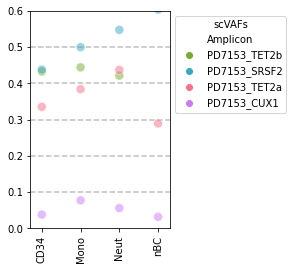

In [10]:
pt_id = 'PD7153'
plate = idh.data_retrieval2(sourcefile, metadata, pt_id)
PD7153data = plate.copy()
reads = 10
plate1_PD7153 = idh.calc_scVAF_mod_resc(plate, pt_id, reads, draw_plot = True)

JP001
Cells with at least 10 reads for amplicon JP001_SRSF2  =  3078
Mono 744
Neut 494
nBC 761
CD34 1079
Cells with at least 10 reads for amplicon JP001_TET2a  =  3324
Mono 759
Neut 761
nBC 765
CD34 1039
Cells with at least 10 reads for amplicon JP001_TET2b_g  =  2723
Mono 644
Neut 463
nBC 685
CD34 931
Cells with at least 10 reads for amplicon JP001_RUNX1_g  =  3419
Mono 765
Neut 763
nBC 768
CD34 1123


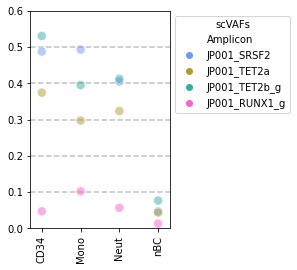

In [11]:
pt_id = 'JP001'
plate = idh.data_retrieval2(sourcefile, metadata, pt_id)
reads = 10
plate1_JP001 = idh.calc_scVAF_mod_resc(plate, pt_id, reads, draw_plot = True)

In [12]:
#Combine data from all patients
frames = [plate1_JP001, plate1_PD7153, plate1_PD7151]
plate1_all = pd.concat(frames)

pt_test = []
for index, row in plate1_all.iterrows():
    pt_test.append(row['Amplicon'].split('_')[0])

plate1_all['Pt'] = pt_test

In [13]:
#Rearrange and include cell numbers
pts = ['PD7153', 'PD7151', 'JP001']

all_amps = ['PD7153_TET2a',
            'PD7151_TET2a',
            'JP001_TET2a',
            'PD7153_TET2b',
            'PD7151_TET2b',
            'JP001_TET2b_g',
            'PD7153_SRSF2',
            'JP001_SRSF2',
            'PD7153_CUX1',
            'JP001_RUNX1_g'
           ]
short_label = ['TET2[a]',
               'TET2[a]',
               'TET2[a]',
               'TET2[b]',
               'TET2[b]',
               'TET2[b]',
               'SRSF2',
               'SRSF2',
               'CUX1',
               'RUNX1'
              ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

#Convert categoricals to numbers on x axis
cell_order = ['CD34', 'Mono', 'Neut', 'nBC']
cell_order_map = {x:i for i, x in enumerate(cell_order)}

plate1_all['x_value'] = plate1_all['sort_celltype'].map(cell_order_map)

#Nudge all the points by tweaking x value
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.12
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.12

plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.12
plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_CUX1', 'x_value'] += 0.12

plate1_all.loc[plate1_all['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.04


In [14]:
bd_df = plate1_all.copy()
#Nudge all the points a bit further for bar plots
bd_df.loc[bd_df['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.15
bd_df.loc[bd_df['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.05
bd_df.loc[bd_df['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.05
bd_df.loc[bd_df['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.15

bd_df.loc[bd_df['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.15
bd_df.loc[bd_df['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.05
bd_df.loc[bd_df['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.05
bd_df.loc[bd_df['Amplicon'] == 'PD7153_CUX1', 'x_value'] += 0.15

bd_df.loc[bd_df['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.05 #was 0.5 w/o SRSF2
bd_df.loc[bd_df['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.05

bar_data = bd_df.groupby(['Pt', 'sort_celltype', 'Amplicon']).mean()
bar_data['Pt'] = bar_data.index.get_level_values(0)
bar_data['Amplicon'] = bar_data.index.get_level_values(2)

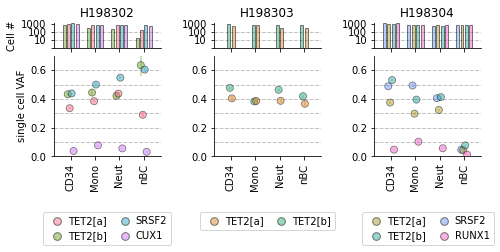

In [24]:
#plot the data
fig, (ax1,ax2) = plt.subplots(2, 3, figsize = (7,4), gridspec_kw = dict(height_ratios = [1,4]), sharex = True) 

ax = ax1
for count, pt in enumerate(pts):
    data = bar_data.loc[bar_data['Pt'].isin([pt])]
    
    for i, row in data.iterrows():
        x = row['x_value']
        y = row['cell_count']
        color = allVAFcols[row['Amplicon']]
        #print('cell number is', y)
        
        ax[count].bar([x], [y], width = 0.12, color = color, alpha = 0.5,  edgecolor = 'black')
    
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    ax[count].set_yscale('log')
    ax[count].set_ylim(1, 1152)
    ax[count].set_yticks([1, 10, 100, 1000])
    ax1labels = ['', 10, 100, 1000]
    ax[count].set_yticklabels(ax1labels)
    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    if count == 0:
        ax[count].set_ylabel('Cell #')
    
    ax[count].axhline(10, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(100, ls = '--', c = 'silver', lw = 1, zorder = 0)

ax = ax2

for count, pt in enumerate(pts):
    
    data = plate1_all.loc[plate1_all['Pt'].isin([pt])]
    
    sns.scatterplot(x = 'x_value', y = 'VAF', data = data, s = 50, hue = 'Amplicon', palette = allVAFcols,  edgecolor = 'black', alpha = 0.5, ax = ax[count])
    handles, labels = ax[count].get_legend_handles_labels() 
    
    #Plot sem bars
    for i, row in data.iterrows():
        x = row['x_value']
        y = row['VAF']
        e = row['sem']
        color = allVAFcols[row['Amplicon']]
        
        ax[count].errorbar(x, y, yerr=e, fmt='.', color = color, ms = 0, alpha = 0.5, zorder = 0)
    
    #rename labels for amplicons
    lbl = [] 

    for lb in labels:
        if lb not in all_amps:
            lbl.append(lb)
        else:
            lbl.append(relabel[lb])
                
    
    if pt == 'JP001':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:5], labels=lbl[1:5])
    elif pt == 'PD7153':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:4], labels=lbl[1:4])
    elif pt == 'PD7151':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:3], labels=lbl[1:3])
    
    ax[count].set_ylim(0,0.7)
    ax[count].axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    pl = pt_label[pt]
    ax1[count].set_title(f'{pl}')
    ax[count].margins(x=0.1)
    
    if count == 0:
        ax[count].set_ylabel('single cell VAF')

        
    
    #Manually adjust ticks and labels since now plotting at arbitrary x values
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    
    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        lh.set_edgecolor('black')
        
    #print(lbl)
        
#Add legends

ax[2].legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax[0].legend(handles = PD7153_handles, labels = PD7153_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax[1].legend(handles = PD7151_handles, labels = PD7151_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

plt.rcParams['svg.fonttype'] = 'none'    
fig.tight_layout(h_pad = 0, w_pad = 2)  

fig.savefig(f'../Results/sc_VAFs_cell_no_Fig1.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/sc_VAFs_cell_no_Fig1.png',bbox_inches='tight', dpi = 600)

#Now plot sc vs bulk

In [16]:
#bulk data
bulk_data = variant_annotations_amps.copy()
bulk_data = bulk_data[['celltype', 'Mean_VAF', 'Amplicon', 'patient_init']]
bulk_data.columns = ['ct', 'b_VAF', 'amplicon', 'pt']
bulk_data['b_ct'] = bulk_data['ct']
bulk_data.shape[0]

39

In [17]:
#sc data
sc_data = plate1_all.copy()
sc_data.columns = ['s_VAF', 'ct', 'amplicon', 's_sem', 's_count', 'pt', 'offset']
sc_data['s_ct'] = sc_data['ct'] #retain old designation for QC
#Rename CD34 to BM for merging
s_rename = {'CD34':'BM'}
sc_data['ct'].replace(s_rename, inplace = True)
sc_data.shape[0]
#sc_data

40

In [18]:
#Merge data
all_VAF = sc_data.merge(bulk_data, on = ['pt', 'ct', 'amplicon'])

All pt/amps (0.8989033544632217, 9.807198911708861e-14)
PD7153 (0.877731436583367, 1.7027135918255632e-05)
PD7151 (0.2910000895706776, 0.5758209625213888)
JP001 (0.9141503960184778, 1.871585906045673e-06)


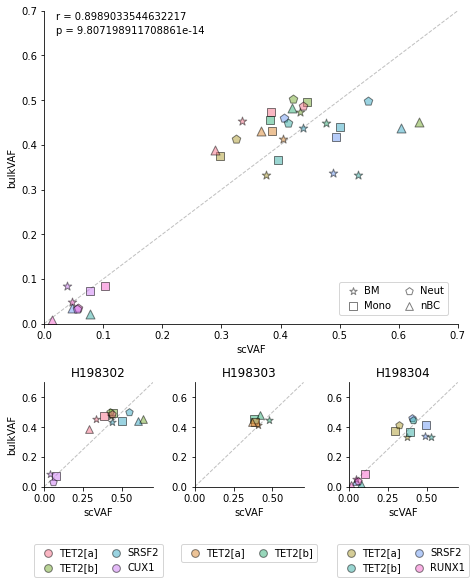

In [19]:
#Plot correlations
#TODO - plot line of fit (but not sure exactly how Fabio suggested to do this)

pts = ['PD7153', 'PD7151', 'JP001']
alt_id = ['H198302', 'H198303', 'H198304']
pt_label = dict(zip(pts, alt_id))

#Note that marker style ditionary is created at the top with the proxy artist for legends

print('All pt/amps', stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF']))
rs = stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF'])[0]
pv = stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF'])[1]


#Create plots
    
#x_list = []
#y_list = []

fig = plt.figure(constrained_layout=True, figsize = (6.5, 8))
gs = fig.add_gridspec(2, 3, height_ratios = [3,1], hspace = 1)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1 :,0])
ax2 = fig.add_subplot(gs[1 :,1])
ax3 = fig.add_subplot(gs[1 :,2])

ax_names = [ax1, ax2, ax3]
an = dict(zip(pts, ax_names))

ax = ax0

#Upper plot

for i, row in all_VAF.iterrows():
    x = row['s_VAF']
    #x_list.append(x)
    y = row['b_VAF']
    #y_list.append(y)
    color = allVAFcols[row['amplicon']]
    marker = m_style[row['ct']]
    ax.scatter(x, y, color = color, alpha = 0.5, marker = marker, s = 80, edgecolor = 'black')

#Plot 1:1 correlation line
x = np.array([0, 0.2, 0.4, 0.6, 0.7])
ax.plot(x, x, ls = '--', c = 'silver', lw = 1, zorder = 0)

ax.set_ylim(0,0.7)
ax.set_xlim(0,0.7)
ax.margins(x=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('bulkVAF')
ax.set_xlabel('scVAF')
#ax.text(0.3, 0.05, f'r = {rs}') #bottom right location
#ax.text(0.3, 0.02, f'p = {pv}') #bottom right location

ax.text(0.02, 0.68, f'r = {rs}') #upper left location
ax.text(0.02, 0.65, f'p = {pv}') #upper left location

#ax.set_title('All patients, all amplicons')

#Lower plots

for count, pt in enumerate(pts):
    
    data = all_VAF.loc[all_VAF['pt'].isin([pt])]

    #x_list = []
    #y_list = []

    for i, row in data.iterrows():
        ax = an[pt]
        x = row['s_VAF']
        #x_list.append(x)
        y = row['b_VAF']
        #y_list.append(y)
        color = allVAFcols[row['amplicon']]
        marker = m_style[row['ct']]
        ax.scatter(x, y, color = color, alpha = 0.5, s = 60, marker = marker, edgecolor = 'black')
    
    #Plot 1:1 correlation line
    x = np.array([0, 0.2, 0.4, 0.6, 0.7])
    ax.plot(x, x, ls = '--', c = 'silver', lw = 1, zorder = 0)
    
    ax.set_ylim(0,0.7)
    ax.set_xlim(0,0.7)
    ax.margins(x=0.1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('scVAF')
    label = pt_label[pt]
    ax.set_title(f'{label}')
    
    if pt == 'PD7153':
        ax.set_ylabel('bulkVAF')
    
    print(pt, stat.pearsonr(data['s_VAF'], data['b_VAF']))
    
#Add legends
ax0.legend(handles = cs_handles, labels = cs_labels, loc = 'upper left',bbox_to_anchor = [0.7,0.15], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax3.legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax1.legend(handles = PD7153_handles, labels = PD7153_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax2.legend(handles = PD7151_handles, labels = PD7151_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.savefig(f'../Results/allVAFs_composite_Sfig.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/allVAFs_composite_Sfig.png',bbox_inches='tight', dpi = 600)

In [20]:
#VAFS for extra cell types
extras = pd.read_excel('../Data/VAF_data/JP001_newsort_sanger.xlsx', sheet_name = 'Sheet1')

#Add in numerical x location
cell_order2 = ['Mono', 'nBC', 'memB', 'nTC', 'memT', 'NK']
cell_order_map2 = {x:i for i, x in enumerate(cell_order2)}

extras['x_value'] = extras['Cells'].map(cell_order_map2)

#Tweak amplicon names so that color palette works
an = ['JP001_SRSF2','JP001_TET2a','JP001_TET2b_g','JP001_RUNX1_g']
ao = ['SRSF2','TET2a','TET2b','RUNX1']
gene_amp = dict(zip(ao, an))


extras['Amplicon'] = extras['Gene'].replace(gene_amp)

#Nudge all the points by tweaking x value
extras.loc[extras['Gene'] == 'SRSF2', 'x_value'] -= 0.12
extras.loc[extras['Gene'] == 'TET2a', 'x_value'] -= 0.04
extras.loc[extras['Gene'] == 'TET2b', 'x_value'] += 0.04
extras.loc[extras['Gene'] == 'RUNX1', 'x_value'] += 0.12
#extras

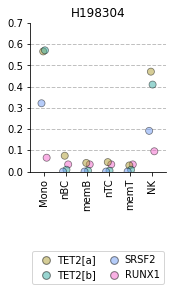

In [21]:
fig, ax = plt.subplots(figsize = (2.5,5))
sns.scatterplot(x = 'x_value', y = 'VAF_freq', data = extras, s = 50, hue = 'Amplicon', palette = allVAFcols,  edgecolor = 'black', alpha = 0.5, ax = ax)

handles, labels = ax.get_legend_handles_labels() 

ax.legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

ax.set_ylim(0,0.7)
ax.axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='x', labelrotation = 90)
ax.margins(x=0.1)

ax.set_xticks(np.arange(len(cell_order2)))
ax.set_xticklabels(cell_order2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('H198304')

for lh in lgd.legendHandles: 
    lh.set_alpha(0.5)
    lh.set_edgecolor('black')

plt.rcParams['svg.fonttype'] = 'none'    
fig.tight_layout(h_pad = 0, w_pad = 2)  

fig.savefig(f'../Results/extra_VAFs_Sfig.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/extra_VAFs_Sfig.png',bbox_inches='tight', dpi = 600)


In [22]:
#New captureVAFs from secondary sort
directory = '../Data/VAF_data/NZ_VAF/'
targets = ['TET2', 'SRSF2', 'RUNX1']
targs = ['p.Pro95Arg', 'p.Gly1218fs', 'p.Tyr1337', 'p.Ala187Thr']
ids = ['JP001_SRSF2','JP001_TET2a','JP001_TET2b_g','JP001_RUNX1_g']
targ_id = dict(zip(targs, ids))
pattern = '|'.join(targs)
samples = ['monocyte', 'DPlusCD27min', 'DminCD27plus', 'naiveT', 'memT','NK' ]
celltypes = ['Mono' , 'nBC', 'memB', 'nTC', 'memT', 'NK']
samp_ct = dict(zip(samples, celltypes))

#Create a list of the field extracted files
files = []
for fn in os.listdir(directory):
    if 'fields' in fn:
         files.append(fn)
            
sample_dict = {}

for f in files:
    sn = f.split('_')[2] #get the sample name
    ty = f.split('_')[8] #Is is a SNP or indel?
    samp = sn + '_' + ty #unique dictionary name
    df = pd.read_csv(f'../Data/VAF_data/NZ_VAF/{f}', sep = '\t')
    df['gene'] = df['ANN[*].GENE'].str.split('~').str[0]
    df['sample'] = sn
    df['type'] = ty
    df2 = df.loc[df['gene'].isin(targets)] #Just grab the tracked variants
    sample_dict[samp] = df2

#Combine all the samples in a single df
all_samples = pd.concat(sample_dict.values(), axis = 0)

for t in targs:
    all_samples[t] = all_samples['ANN[*].HGVS_P'].str.contains(t) #works out which rows have the desired mutations

all_samples['no_hit'] = (all_samples['ANN[*].HGVS_P'].str.contains(pattern)) == False

targs.append('no_hit')  #account for variants that were not tracked
ids.append('no_hit')

for a, b in zip(targs, ids):
    all_samples.loc[all_samples[a] == True, 'Amplicon'] = b 

all_samples['celltype'] = all_samples['sample'].replace(samp_ct)
all_samples['VAF'] = all_samples['GEN[*].FREQ'].str.rstrip('%').astype('float') / 100.0  #turn % call into a decimal

all_samples.to_excel('../Data/VAF_data/NZ_VAF/all_variants_target_genes.xlsx', index = None)

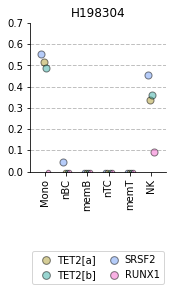

In [23]:
data = all_samples.loc[all_samples['no_hit'] == False]

ids2 = ['JP001_SRSF2','JP001_TET2a','JP001_TET2b_g','JP001_RUNX1_g']
nudge = [-0.15, -0.05, 0.05, 0.15 ]
idn = dict(zip(ids2, nudge))

fig, ax = plt.subplots(figsize = (2.5,5))
for i, c in enumerate(celltypes):
    for a in ids2:
        x = i + idn[a]
        color = allVAFcols[a]
        
        if data.loc[(data['celltype'] == c) & (data['Amplicon'] == a)].empty:
            y = 0 #dummy off scale plot for variants that weren't detected
            ax.scatter(x, y, color = color, alpha = 0.5,  s = 20, edgecolor = 'black')
        else:
            y = data.loc[(data['celltype'] == c) & (data['Amplicon'] == a)]['VAF'].to_list()[0]
            ax.scatter(x, y, color = color, alpha = 0.5,  s = 50, edgecolor = 'black')
        
        #ax.scatter(x, y, color = color, alpha = 0.5,  s = 80, edgecolor = 'black')

ax.set_ylim(0,0.7)
ax.axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='x', labelrotation = 90)
ax.margins(x=0.1)

ax.set_xticks(np.arange(len(celltypes)))
ax.set_xticklabels(celltypes)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('H198304')
ax.legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

for lh in lgd.legendHandles: 
    lh.set_alpha(0.5)
    lh.set_edgecolor('black')

plt.rcParams['svg.fonttype'] = 'none'    
fig.tight_layout(h_pad = 0, w_pad = 2)  

fig.savefig(f'../Results/extra_VAFs_NZ_Sfig.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/extra_VAFs_NZ_Sfig.png',bbox_inches='tight', dpi = 600)